In [152]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTree
import time

class Bagging:
    
    def __init__(self, n_iter=20):
        self.n_iter = n_iter
        self.estimator = DTree(random_state=1)
        
    def train(self, X_train, y_train,percentage=0.2):
        self.percentage = percentage
        self.estimators = []
        n_samples = X_train.shape[0]
        start_time = time.time()
        for i in range(self.n_iter):
            indices = np.random.randint(0, n_samples, np.int(self.percentage * n_samples))
            cur_X_train = X_train[indices]
            cur_y_train = y_train[indices]
            self.estimator.fit(cur_X_train, cur_y_train)
            self.estimators.append(self.estimator)
        end_time = time.time()
        return end_time - start_time
    
    def predict(self, X_test, y_test = None):
        predctions = []
        for x in X_test:
            cur_prediction = Counter()
            for estimator in self.estimators:
                cur_prediction[estimator.predict(x.reshape(1,len(x)))[0]] += 1
            predctions.append(cur_prediction.most_common(1)[0][0])
        predctions = np.array(predctions)
        if y_test is not None:
            accuracy = np.sum(predctions == y_test)/len(y_test)
            print('Accuracy:', accuracy)
            return predctions, accuracy
        return predctions
        

In [153]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_hastie_10_2
from sklearn.datasets import load_iris
from collections import Counter

X, y = make_hastie_10_2()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

bagging = Bagging()

time_spend = []
accuracies = []
for i in np.arange(0.1, 1.0, 0.1):
    cur_time = bagging.train(X_train, y_train, percentage = i)
    accuracy = bagging.predict(X_test, y_test)[1]
    time_spend.append(cur_time)
    accuracies.append(accuracy)

Accuracy: 0.6979166666666666
Accuracy: 0.7266666666666667
Accuracy: 0.7533333333333333
Accuracy: 0.7625
Accuracy: 0.7575
Accuracy: 0.7554166666666666
Accuracy: 0.7541666666666667
Accuracy: 0.7604166666666666
Accuracy: 0.7654166666666666


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


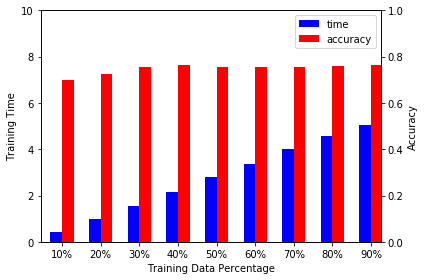

In [172]:
import matplotlib.pyplot as plt
import pandas as pd

bars = plt.figure()
plot_df = pd.DataFrame(data = [time_spend,accuracies]).T
plot_df.index = ['10%', '20%', '30%','40%','50%','60%','70%','80%','90%']
plot_df.columns = ['time','accuracy']

figure = plt.figure()
ax1 = figure.add_subplot(111)
ax2 = ax1.twinx()

plot_df.accuracy.plot(kind = 'bar', color = 'red', ax = ax2, width = 0.3, position = 0, rot=0)
plot_df.time.plot(kind = 'bar', color = 'blue', ax = ax1, width = 0.3, position = 1, rot=0)
ax1.set_ylabel('Training Time')
ax1.set_ylim(0,10)
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0,1)

handles,labels = [],[]
for ax in figure.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
ax1.set_xlabel('Training Data Percentage')
plt.legend(handles,labels)
plt.tight_layout()
plt.show()